实验目的：

产生两个具有不同增益的扫频信号
利用相关检测提高检测灵敏度


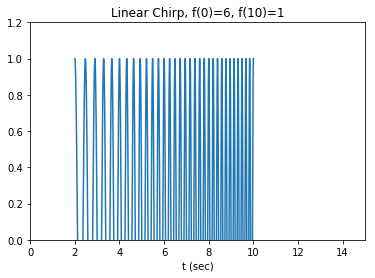

In [60]:
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(2, 10, 5001)
w = chirp(t, f0=1, f1=6, t1=10, method='linear')


plt.plot(t, w)
plt.title("Linear Chirp, f(0)=6, f(10)=1")
plt.xlabel('t (sec)')
plt.ylim(0,1.2)
plt.xlim(0,15)
plt.show()

In [63]:
import numpy as np
# single frequency signal
sampling_rate = 2**14
fft_size = 2**12
t = np.arange(0, 1, 1.0/sampling_rate)




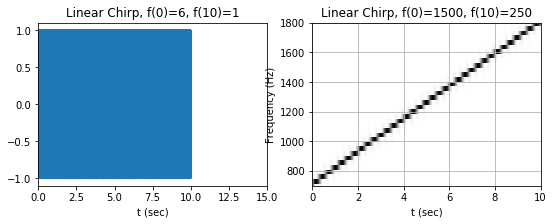

In [25]:
fs = 8000   #resolution
T = 10
t = np.linspace(0, T, T*fs, endpoint=False)
w = chirp(t, f0=70*10, f1=1800, t1=10, method='linear')

plt.figure(1, figsize=(9, 3))
plt.subplot(121)
plt.plot(t, w)
plt.title("Linear Chirp, f(0)=6, f(10)=1")
plt.xlabel('t (sec)')
plt.xlim(0,15)


plt.subplot(122)
ff, tt, Sxx = spectrogram(w, fs=fs)
plt.pcolormesh(tt, ff[:513], Sxx[:513], cmap='gray_r')
# plt.pcolormesh(tt+3, ff[:513], Sxx[:513], cmap='gray_r')
plt.title('Linear Chirp, f(0)=1500, f(10)=250')
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.ylim(700,1800)
plt.xlim(0,10)
plt.grid()
plt.show()

1025 624 639600


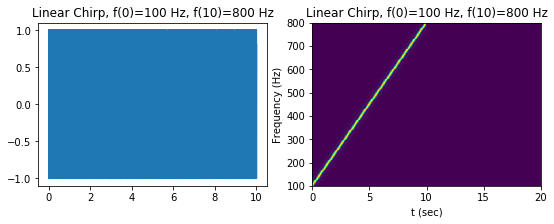

In [29]:
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
import numpy as np

fs = 8000
T = 10
f0=100
f1=800

t = np.linspace(0, T, T*fs, endpoint=False)
w = chirp(t, f0=f0, f1=f1, t1=10, method='linear')

# print(type(w),w.size)
z=np.zeros(w.size) #give a zero array
w2 = np.concatenate((w,z)) 
# print(w2.size)

ff, tt, Sxx = spectrogram(w2, fs=fs,noverlap=256, nperseg=512,
                          nfft=2048)

plt.figure(1, figsize=(9, 3))

plt.subplot(121)
plt.plot(t,w)
plt.title("Linear Chirp, f(0)=100 Hz, f(10)=800 Hz")


plt.subplot(122)
print(ff.size,tt.size,Sxx.size)
plt.pcolormesh(tt, ff, Sxx)
plt.title('Linear Chirp, f(0)=100 Hz, f(10)=800 Hz')
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.ylim(f0,f1)
plt.xlim(0,20)

plt.show()

Target Range = 300.0 m.
Time cost: 2.00 us


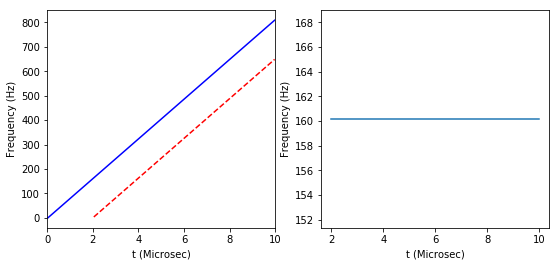

Simulation Target Range = 300.29297 m.


In [42]:
# simulation two chirp signal 
# object distance is d(300m)
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
import numpy as np
fs = 8000  
T = 10    #chirp time
f0=100    #chirp begin frequency
f1=800    #chirp end frequency
d= 300    #distance  is 300 m
c = 3*1e8 # acoustic velocity
 
time_delay= 2*d/c  


def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]


print('Target Range = %3.1f m.' %d);
print('Time cost: %3.2f us' %(time_delay*1e6))
t = np.linspace(0, T, T*fs, endpoint=False)
w = chirp(t, f0=f0, f1=f1, t1=T, method='linear')

w1 = chirp(t, f0=f0, f1=f1, t1=T, phi=45,method='linear')


ff, tt, Sxx = spectrogram(w, fs=fs,noverlap=128, nperseg=512,nfft=2048)
ff1,tt1,Sxx1= spectrogram(w1, fs=fs,noverlap=256, nperseg=512, nfft=2048) 
                                                  

plt.figure(1, figsize=(9, 4))

plt.subplot(121)
z=np.zeros(int(time_delay*1e6* tt.size /T)) #make  a zero array size is time_delay* tt.size /T   :40


ff1= np.concatenate((z,ff))
ff3=zero_to_nan(ff1)    # change 0 to 'nan' 
plt.plot(tt,ff[:tt.size],'b')
plt.plot(tt,ff3[:tt.size],'r--')
plt.xlabel('t (Microsec)')
plt.ylabel('Frequency (Hz)')
# plt.ylim(f0,f1)
plt.xlim(0,10)


plt.subplot(122)
plt.figure(1, figsize=(5, 4))
t = np.linspace(2, T, (T-2)*100)
plt.plot(t,ff[100:900]-ff1[100:900])
plt.ylabel('Frequency (Hz)')
plt.xlabel('t (Microsec)')
plt.savefig('Linear Chirp Signal.png', dpi=300)
plt.show()

t_back = 10*(ff[100]-ff1[100])/800 #simulation the cost time us
d_back = t_back*1e-6*c/2
print ('Simulation Target Range = %3.5f m.' %d_back)



$$  f_{if} =\frac{S2d}{c}$$
其中$S= f_1 - f_0 =800 -0 =800$，

In [59]:
t1 =ff[100]-ff1[100]
t2 = 1/(ff[100]-ff1[100])
t3 =  (t2 /2 )*c

print('t1 =%2.2f'%t1,'t2 = %2.5f'%t2, 't3= %2.2f'%t3)

t1 =160.16 t2 = 0.00624 t3= 936585.37


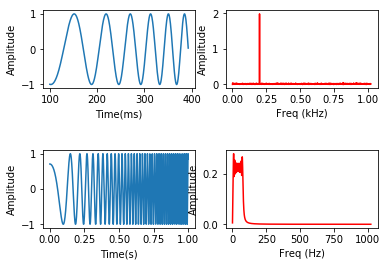

In [150]:
import matplotlib.pyplot as plt
# import plotly.plotly as py
import numpy as np
import pandas as pd


Fs = 2048;  # sampling rate
Ts = 1.0/Fs; # sampling interval
fft_size = Fs/4

t = np.arange(0,1,Ts) # time vector

ff = 200;   # frequency of the signal

# Generate signal
y = np.sin(2*np.pi*ff*t)
y = y+ 0.2*np.random.normal(0.0,1.0,len(y))
w1 = chirp(t, f0=0, f1=200, t1=5 , phi=45,method='linear')

 
# FFT signal1
n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency rangen
Y = np.fft.fft(y)/fft_size # fft computing and normalization
Y = Y[range(int(n/2))]

n1 = len(w1) # length of the signal
k1 = np.arange(n1)
T1 = n1/Fs
frq1 = k1/T1 # two sides frequency range
frq1 = frq1[range(int(n1/2))] # one side frequency rangen
Y1 = np.fft.fft(w1)/fft_size # fft computing and normalization
Y1 = Y1[range(int(n1/2))]



fig, ax= plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.8)



ax[0,0].plot(t[:100]*1000,y[:100])
ax[0,0].set_xlabel('Time(ms)')
ax[0,0].set_ylabel('Amplitude')

ax[0,1].plot(frq/1000,abs(Y),'r') # plotting the spectrum
ax[0,1].set_xlabel('Freq (kHz)')
ax[0,1].set_ylabel('Amplitude')

ax[1,0].plot(t,w1)
ax[1,0].set_xlabel('Time(s)')
ax[1,0].set_ylabel('Amplitude')

ax[1,1].plot(frq,abs(Y1),'r') # plotting the spectrum
ax[1,1].set_xlabel('Freq (Hz)')
ax[1,1].set_ylabel('Amplitude')

plt.show()

# plot_url = py.plot_mpl(fig, filename='mpl-basic-fft')

Add hamming windos

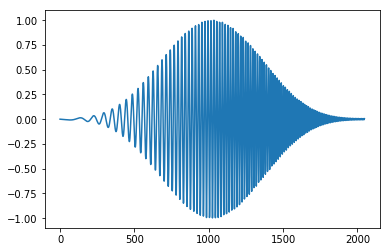

In [280]:
def add_window(values,Fs):
    """returen hamming window"""
    window = np.hamming(Fs)
    values = window*values
    return values

#indow = np.hamming(Fs)
#2= w1*window
w1 = add_window(w1,Fs)
plt.plot(w1)

In [491]:

def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

#t = np.arange(0,1,Ts) # time vector
fs = 2048   #resolution
T = 5
t = np.linspace(0, T, T*fs, endpoint=False)

t1 = np.arange(0.5,1.5,Ts)
w1 = chirp(t, f0=5, f1=400, t1=T , phi=90,method='linear')
w3 = chirp(t, f0=5, f1=400, t1=T , phi=0,method='linear')
n1 = np.zeros(256)
w2 = np.append(n1, w1)  #delay w1 to produce w2
w3 = np.append(n1, w2)

#w2 =zero_to_nan(w2)
#w2 = np.asarray(w2)
w2 =w2[:fs*T]


plt.plot(t[:1800],w3[:1800])
plt.plot(t[:1800],w2[:1800])
plt.show
plt.savefig('Two Linear Chirp Signals.png', dpi=300)
print(w3[700]-w1[700])



ValueError: operands could not be broadcast together with shapes (10496,) (10752,) 

In [414]:
T1 =w1
T2 =w2
w2.size

10240

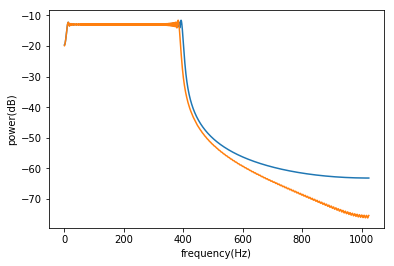

In [355]:
#pl.plot(np.clip(20*np.log10(np.abs(fy[:20])), -120, 120), "o")

#fft w1
n = len(w1) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency rangen
Y = np.fft.fft(w1)/fft_size # fft computing and normalization
Y = Y[range(int(n/2))]
Y = np.clip(20*np.log10(np.abs(Y)), -120, 120)



plt.plot(frq,Y,frq1,Y1)
plt.xlabel("frequency(Hz)")
plt.ylabel("power(dB)")

plt.show
plt.savefig('FFT signal1.png', dpi=300)



Text(0, 0.5, 'power(dB)')

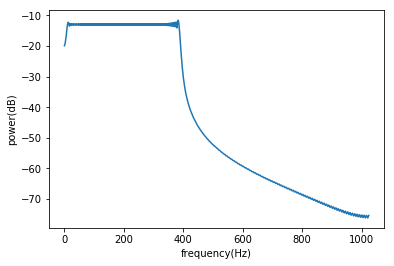

In [333]:
#fft w2

n1 = len(w2) # length of the signal
k1 = np.arange(n1)
T1 = n1/Fs
frq1 = k1/T1 # two sides frequency range
frq1 = frq1[range(int(n1/2))] # one side frequency rangen
Y1= np.fft.fft(w2)/fft_size # fft computing and normalization
Y1 = Y1[range(int(n/2))]
Y1 = np.clip(20*np.log10(np.abs(Y1)), -120, 120)
plt.plot(frq1,Y1)
plt.xlabel("frequency(Hz)")
plt.ylabel("power(dB)")


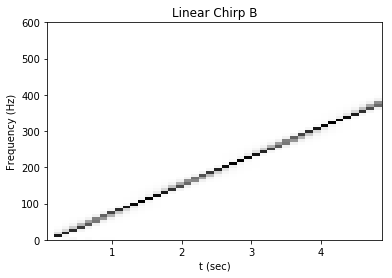

In [368]:
fs = 2048   #resolution
T = 5
t = np.linspace(0, T, T*fs, endpoint=False)
w = chirp(t, f0=20, f1=500, t1=10, method='linear')

ff, tt, Sxx = spectrogram(w2,fs=fs)
plt.pcolormesh(tt, ff, Sxx, cmap='gray_r')
# plt.pcolormesh(tt+3, ff[:513], Sxx[:513], cmap='gray_r')
plt.title('Linear Chirp B')
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0,600)

plt.show
plt.savefig('spectrogram results.png', dpi=300)

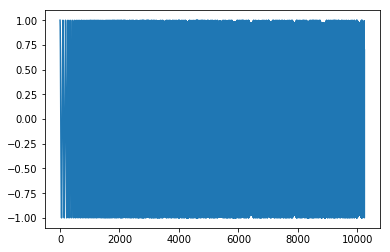

In [273]:
plt.plot(w)

Text(0, 0.5, 'Frequency (Hz)')

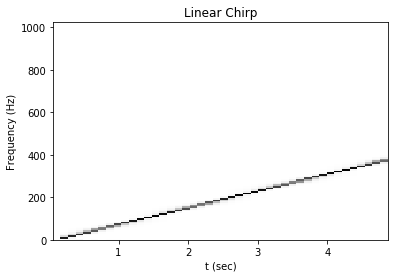

In [378]:
ff, tt, Sxx = spectrogram(w1,fs=Fs)

ff1, tt1, Sxx1 = spectrogram(w2,fs=fs)


plt.pcolormesh(tt, ff, Sxx, cmap='gray_r')
plt.pcolormesh(tt1, ff1, Sxx1, cmap='gray_r')
plt.title('Linear Chirp')
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')


Text(0, 0.5, 'Frequency (Hz)')

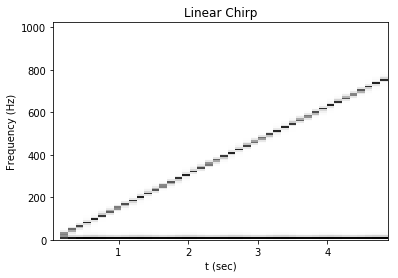

In [399]:

w3 = w1* w2
ff, tt, Sxx = spectrogram(w3,fs=Fs)
plt.pcolormesh(tt, ff, Sxx, cmap='gray_r')
# plt.pcolormesh(tt+3, ff[:513], Sxx[:513], cmap='gray_r')
plt.title('Linear Chirp')
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')



Text(0, 0.5, 'power(dB)')

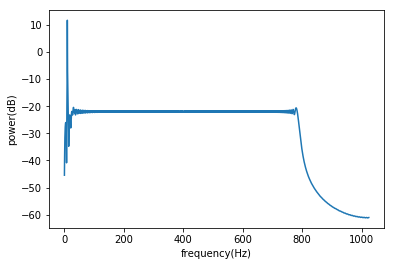

In [400]:
#fft w3 = w1* w2

n1 = len(w3) # length of the signal
k1 = np.arange(n1)
T1 = n1/Fs
frq1 = k1/T1 # two sides frequency range
frq1 = frq1[range(int(n1/2))] # one side frequency rangen
Y1= np.fft.fft(w3)/fft_size # fft computing and normalization
Y1 = Y1[range(int(n/2))]
Y1 = np.clip(20*np.log10(np.abs(Y1)), -120, 120)
plt.plot(frq1,Y1)
plt.xlabel("frequency(Hz)")
plt.ylabel("power(dB)")


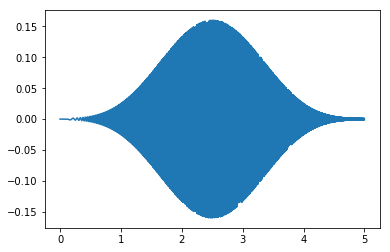

In [415]:
def add_window(values,Fs):
    """returen hamming window"""
    window = np.hamming(Fs)
    values = window*values*0.4
    return values

#indow = np.hamming(Fs)
#2= w1*window


w2 = add_window(w2,w1.size)

plt.plot(t,w2)

plt.show
plt.savefig('W2.png', dpi=300)




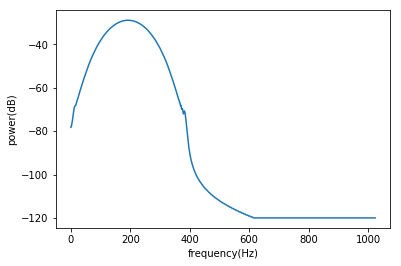

In [417]:
#fft w2

n1 = len(w2) # length of the signal
k1 = np.arange(n1)
T1 = n1/Fs
frq1 = k1/T1 # two sides frequency range
frq1 = frq1[range(int(n1/2))] # one side frequency rangen
Y1= np.fft.fft(w2)/fft_size # fft computing and normalization
Y1 = Y1[range(int(n/2))]
Y1 = np.clip(20*np.log10(np.abs(Y1)), -120, 120)
plt.plot(frq1,Y1)
plt.xlabel("frequency(Hz)")
plt.ylabel("power(dB)")

plt.show
plt.savefig('W2 spectrom.png', dpi=300)

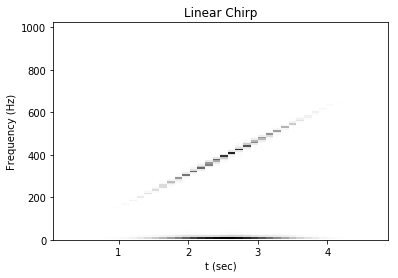

In [419]:
w3 = w1* w2
ff, tt, Sxx = spectrogram(w3,fs=Fs)
plt.pcolormesh(tt, ff, Sxx, cmap='gray_r')
# plt.pcolormesh(tt+3, ff[:513], Sxx[:513], cmap='gray_r')
plt.title('Linear Chirp')
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.show
plt.savefig('W2 spectrom 2.png', dpi=300)

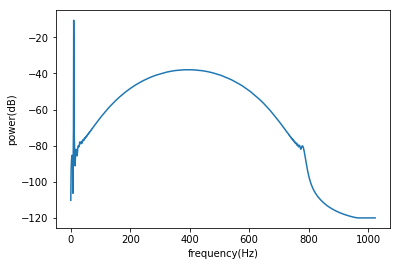

In [420]:
#fft w3
w3 = w1* w2
n1 = len(w3) # length of the signal
k1 = np.arange(n1)
T1 = n1/Fs
frq1 = k1/T1 # two sides frequency range
frq1 = frq1[range(int(n1/2))] # one side frequency rangen
Y1= np.fft.fft(w3)/fft_size # fft computing and normalization
Y1 = Y1[range(int(n/2))]
Y1 = np.clip(20*np.log10(np.abs(Y1)), -120, 120)
plt.plot(frq1,Y1)
plt.xlabel("frequency(Hz)")
plt.ylabel("power(dB)")

plt.show
plt.savefig('W2 spectrom fft.png', dpi=300)

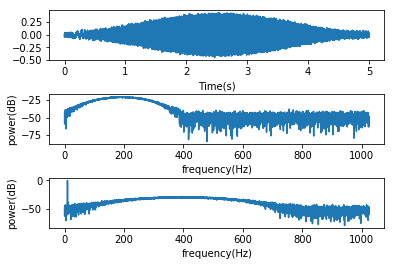

In [459]:
# add noise 
w2 = T2
w2= w2+ 0.2*np.random.normal(0.0,0.1,len(w2))

n1 = len(w2) # length of the signal
k1 = np.arange(n1)
T1 = n1/Fs
frq1 = k1/T1 # two sides frequency range
frq1 = frq1[range(int(n1/2))] # one side frequency rangen
Y1= np.fft.fft(w2)/fft_size # fft computing and normalization
Y1 = Y1[range(int(n/2))]
Y1 = np.clip(20*np.log10(np.abs(Y1)), -120, 120)


fig, (ax1, ax2,ax3) = plt.subplots(3, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.7)

ax1.plot(t,w2)
ax1.set_xlabel("Time(s)")
#ax1.set_ylabel("power(dB)")

ax2.plot(frq1,Y1)
ax2.set_ylabel("power(dB)")
ax2.set_xlabel("frequency(Hz)")

#fft w3
w3 = w1* w2
n1 = len(w3) # length of the signal
k1 = np.arange(n1)
T1 = n1/Fs
frq1 = k1/T1 # two sides frequency range
frq1 = frq1[range(int(n1/2))] # one side frequency rangen
Y1= np.fft.fft(w3)/fft_size # fft computing and normalization
Y1 = Y1[range(int(n/2))]
Y1 = np.clip(20*np.log10(np.abs(Y1)), -120, 120)

ax3.plot(frq1,Y1)
ax3.set_ylabel("power(dB)")
ax3.set_xlabel("frequency(Hz)")

plt.show
plt.savefig('W2 noise 0.1 spectrom fft.png', dpi=300)

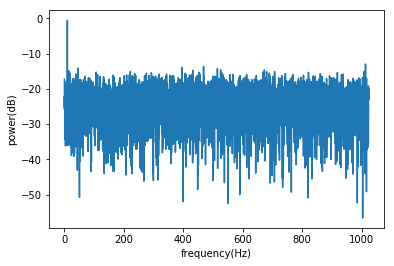

In [475]:
#fft w3
w3 = w1* w2
n1 = len(w3) # length of the signal
k1 = np.arange(n1)
T1 = n1/Fs
frq1 = k1/T1 # two sides frequency range
frq1 = frq1[range(int(n1/2))] # one side frequency rangen
Y1= np.fft.fft(w3)/fft_size # fft computing and normalization
Y1 = Y1[range(int(n/2))]
Y1 = np.clip(20*np.log10(np.abs(Y1)), -120, 120)
plt.plot(frq1,Y1)
plt.xlabel("frequency(Hz)")
plt.ylabel("power(dB)")
plt.show
plt.savefig('W3 noise 0.5 1.0 spectrom fft.png', dpi=300)

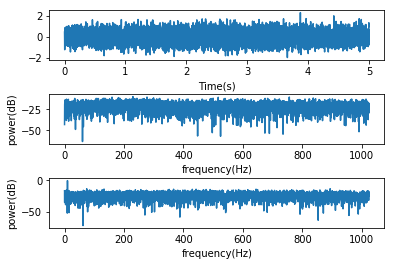

In [476]:
# add noise 
w2 = T2
noise = 0.5*np.random.normal(0.0,1,len(w2))
w2= w2+ noise

n1 = len(w2) # length of the signal
k1 = np.arange(n1)
T1 = n1/Fs
frq1 = k1/T1 # two sides frequency range
frq1 = frq1[range(int(n1/2))] # one side frequency rangen
Y1= np.fft.fft(w2)/fft_size # fft computing and normalization
Y1 = Y1[range(int(n/2))]
Y1 = np.clip(20*np.log10(np.abs(Y1)), -120, 120)


fig, (ax1, ax2,ax3) = plt.subplots(3, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.7)

ax1.plot(t,w2)
ax1.set_xlabel("Time(s)")
#ax1.set_ylabel("power(dB)")

ax2.plot(frq1,Y1)
ax2.set_ylabel("power(dB)")
ax2.set_xlabel("frequency(Hz)")

#fft w3
w3 = w1* w2
n1 = len(w3) # length of the signal
k1 = np.arange(n1)
T1 = n1/Fs
frq1 = k1/T1 # two sides frequency range
frq1 = frq1[range(int(n1/2))] # one side frequency rangen
Y1= np.fft.fft(w3)/fft_size # fft computing and normalization
Y1 = Y1[range(int(n/2))]
Y1 = np.clip(20*np.log10(np.abs(Y1)), -120, 120)

ax3.plot(frq1,Y1)
ax3.set_ylabel("power(dB)")
ax3.set_xlabel("frequency(Hz)")

plt.show
plt.savefig('W2 noise 0.51.0 spectrom fft.png', dpi=300)

-44.58299881656622

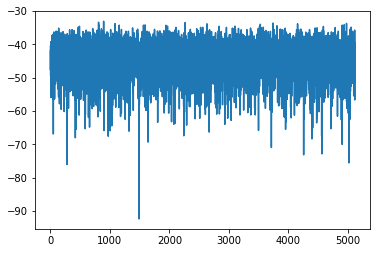

In [486]:
# get noise power
noise = 0.2*np.random.normal(0.0,0.2,len(w2))

n1 = len(noise) # length of the signal
k1 = np.arange(n1)
T1 = n1/Fs
frq1 = k1/T1 # two sides frequency range
frq1 = frq1[range(int(n1/2))] # one side frequency rangen
Y1= np.fft.fft(noise)/fft_size # fft computing and normalization
Y1 = Y1[range(int(n/2))]
Y1 = np.clip(20*np.log10(np.abs(Y1)), -120, 120)

plt.plot(Y1)
np.mean(Y1)

-29.228196274387066

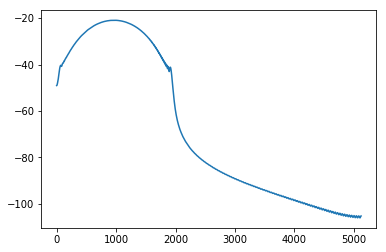

In [482]:
# get signal power
w2 = T2
n1 = len(w2) # length of the signal
k1 = np.arange(n1)
T1 = n1/Fs
frq1 = k1/T1 # two sides frequency range
frq1 = frq1[range(int(n1/2))] # one side frequency rangen
Y1= np.fft.fft(w2)/fft_size # fft computing and normalization
Y1 = Y1[range(int(n/2))]
Y1 = np.clip(20*np.log10(np.abs(Y1)), -120, 120)

plt.plot(Y1)
np.mean(Y1[:2000])